# Project 1

## 1: Demo specific functions

In [1]:
# Import from separate .py files
from ga import *
from p1 import *

In [2]:
# Set parameters

params_1 = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params_1, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['1010001101', '0010000100', '1110101111', '0010111110', '1010100110', '0110101000', '0000101111', '1001101110']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['0000101111', '0110101000', '1010001101', '1010001101', '1010100110', '0010000100', '1001101110', '0000101111']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['10000', '01111', '10000', '01111', '10000', '01111', '10000', '01111']

Mutation:
 ['11110', '10000', '11111', '00010', '11111', '00000', '11011', '00001']


A new generation:
 ['10010', '11111', '10000', '01101', '11000', '01111', '10000', '00111']


## 2: Demo GA - Sine [0, 128]

In [6]:
# DEMO run(), the complete GA with sine fitness function

params_2 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': False
    }
algorithm_2 = GA(params_2, fitness=sine_fitness)
eval_log_2 = algorithm_2.run()

Algorithm succsessfully executed


In [7]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_2.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')
        

Generation: 0 

Population: ['101000101001011', '001000110111011', '011111011110000', '010010101000101', '111111101100101', '111100100011000', '001000100110100', '111001111010110', '000000011010110', '110110101000101', '111011000111100', '001010000111001', '010010000100010', '011001100110000', '000001101100111', '100110111110001', '110100110000011', '101100100010010', '000011010001010', '000100100111000'] 

Population weights: [0.02860648 0.00461794 0.05090227 0.02686847 0.09150528 0.09162735
 0.00013118 0.06410491 0.08021007 0.0752225  0.00408931 0.09119672
 0.         0.0827379  0.03417537 0.07198625 0.00164775 0.08720282
 0.05770083 0.05546659] 

Population sine fitness value: ['-0.38', '-0.90', '0.11', '-0.42', '0.99', '0.99', '-1.00', '0.39', '0.74', '0.63', '-0.91', '0.98', '-1.00', '0.80', '-0.26', '0.56', '-0.96', '0.89', '0.25', '0.20'] 


Generation: 10 

Population: ['111001011100000', '111001101010010', '111101000010100', '001001001010000', '011001101110100', '1111010000100

<IPython.core.display.Javascript object>


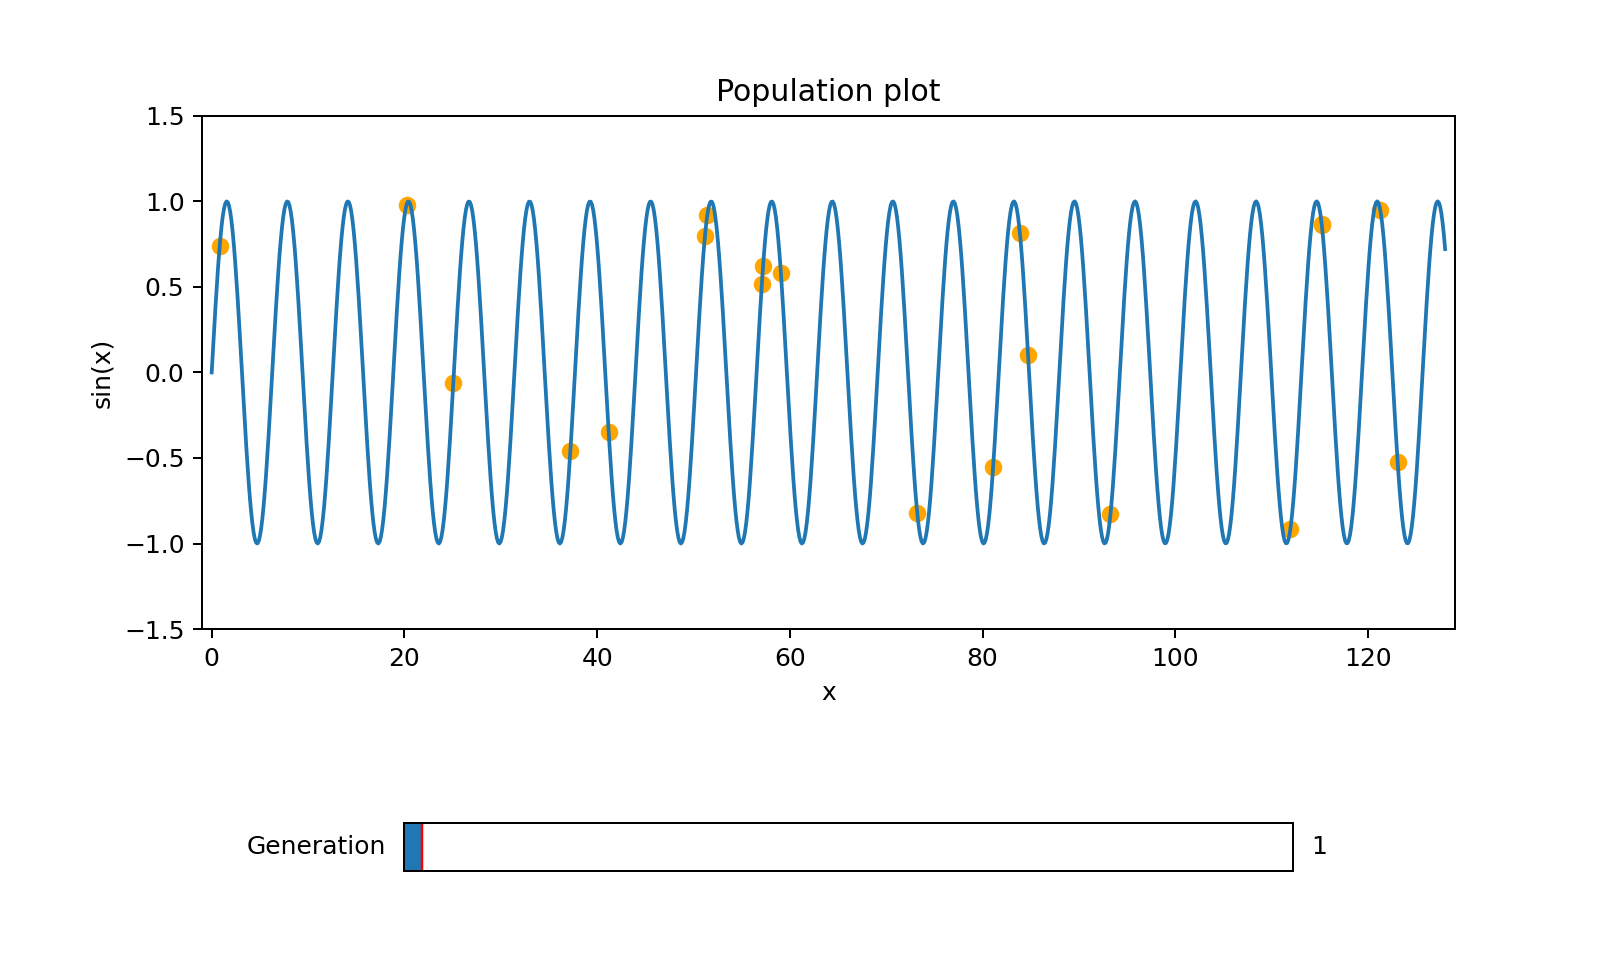

0

In [8]:
# Plot the population through the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


DATA = eval_log_2

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_2['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


    


<IPython.core.display.Javascript object>


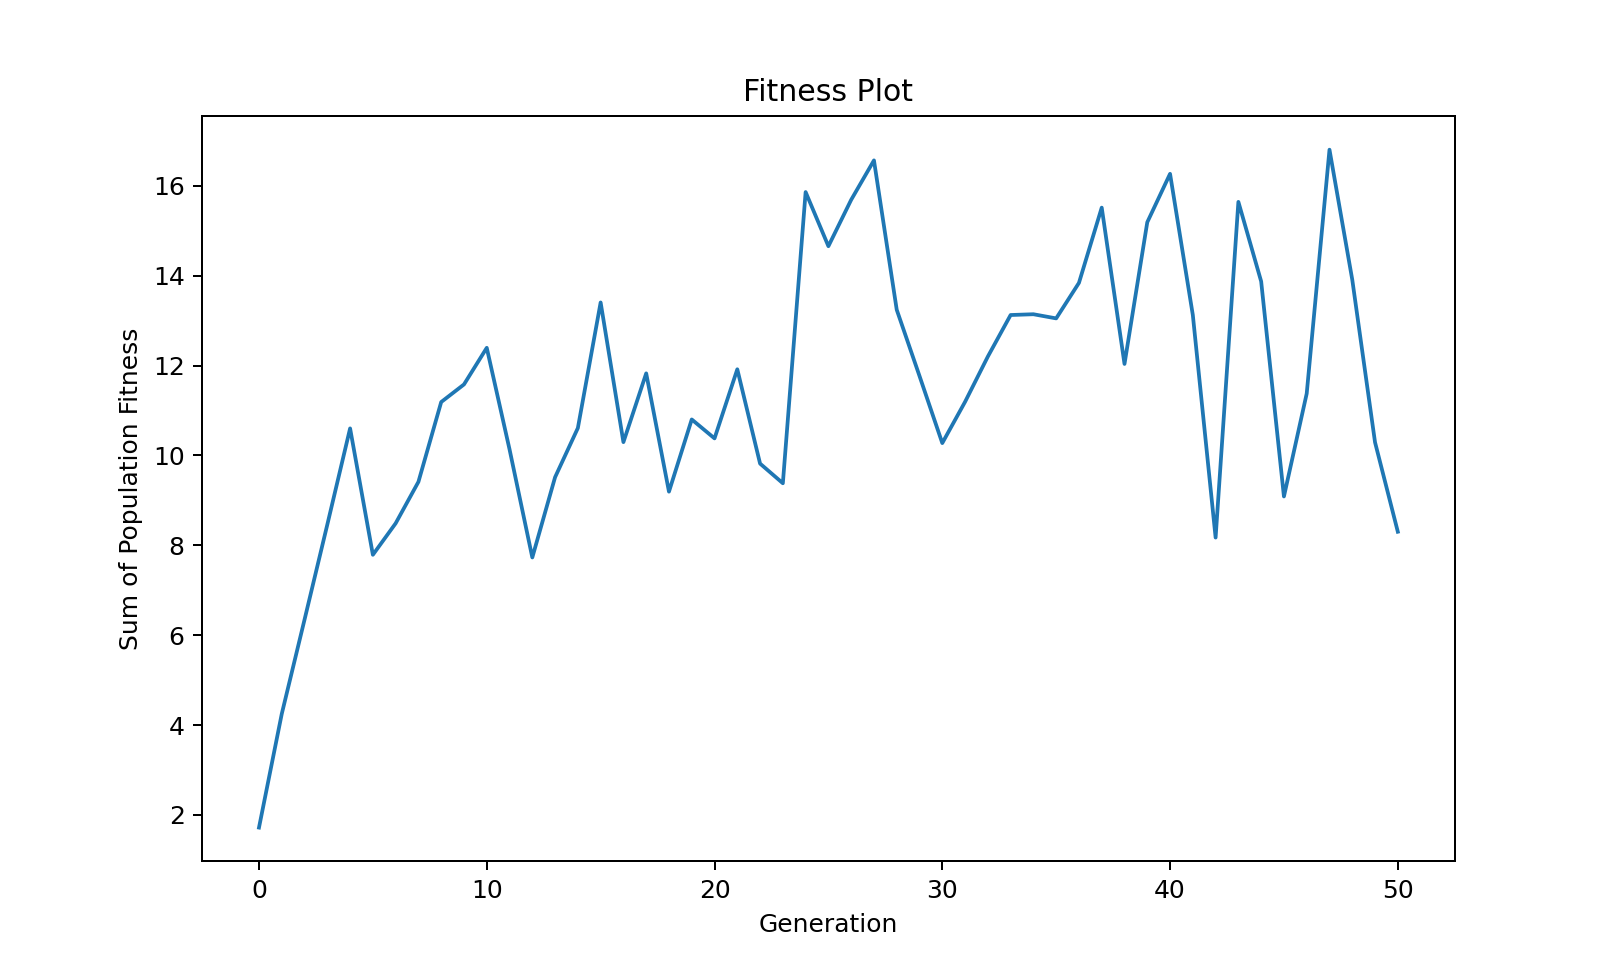

In [9]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_2[i][3]) for i in eval_log_2.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [10]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()


Algorithm succsessfully executed


In [11]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_3.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')

Generation: 0 

Population: ['011111111000101', '100011001000001', '001100000010000', '100110110000001', '011010101111000', '100100100010000', '010100010111111', '110111101010000', '111011101110000', '101011110000010', '111010000001100', '011001110001011', '010011010001100', '111011100101111', '000011010101101', '111001010000100', '100100110111100', '001101010001100', '101000111000010', '011010001011101'] 

Population weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 

Population sine fitness value: ['-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '0.38', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25'] 


Generation: 10 

Population: ['000011111101101', '000111110101101', '000011010101000', '000111010100000', '000111111101101', '000011110101000', '000011011101110', '000011110111101', '000011110001000', '000011111101101', '000011110001000', '000011111101101', '000011110001000', '0000111111010

<IPython.core.display.Javascript object>


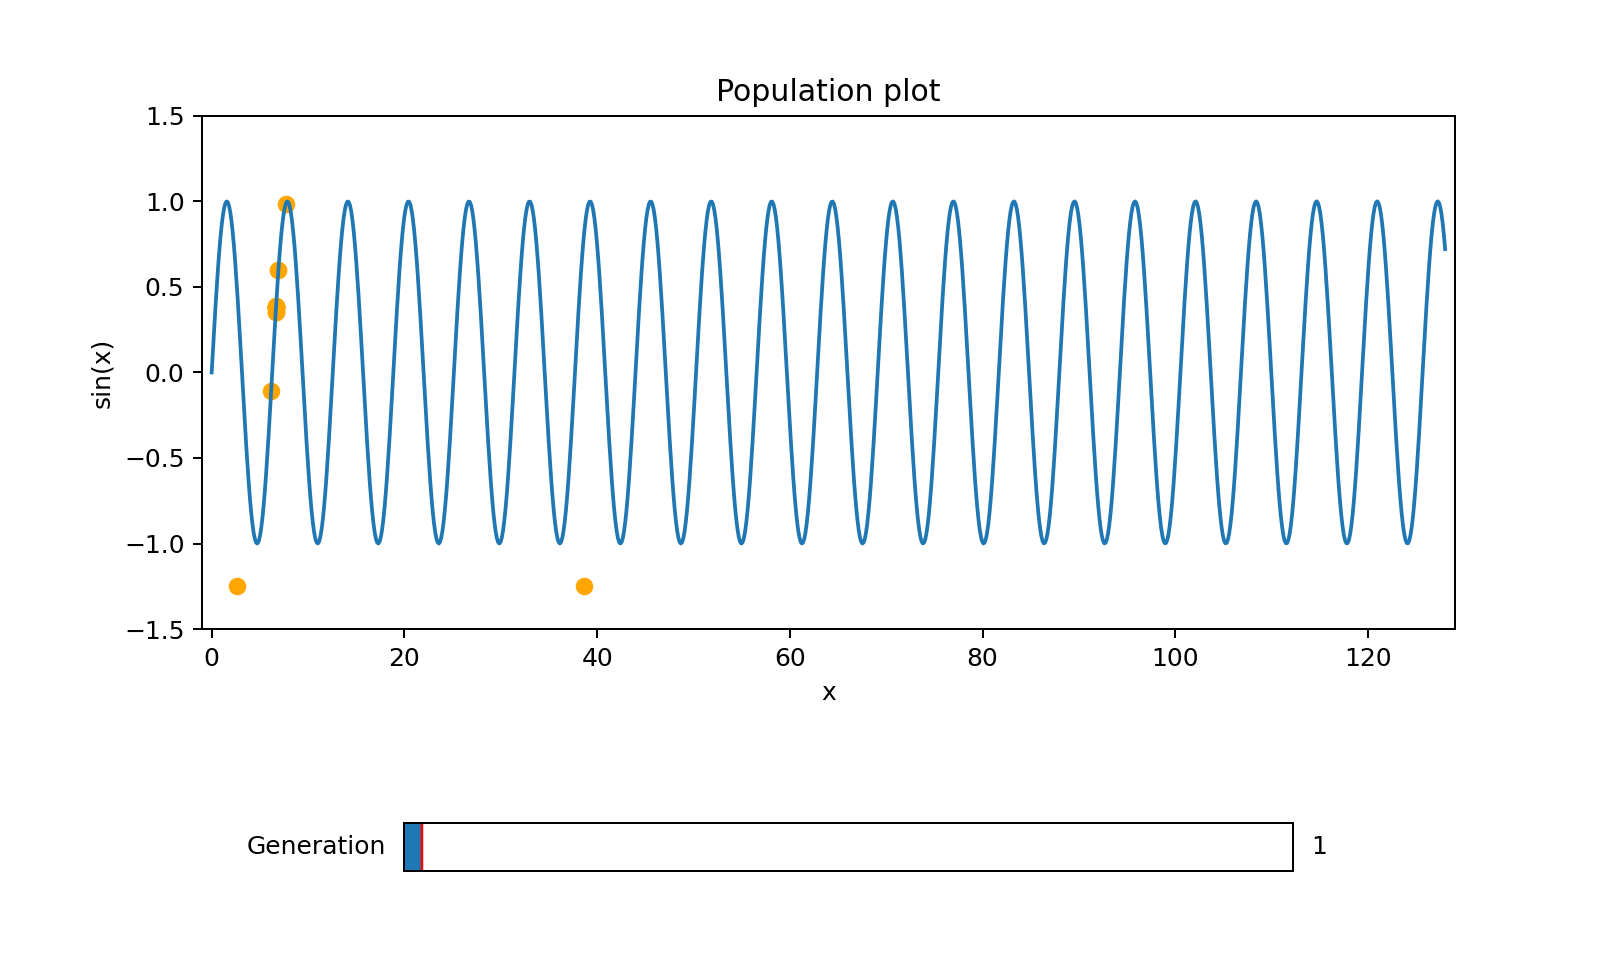

0

In [12]:
# Plot the generations

DATA = eval_log_3

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_3['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


<IPython.core.display.Javascript object>


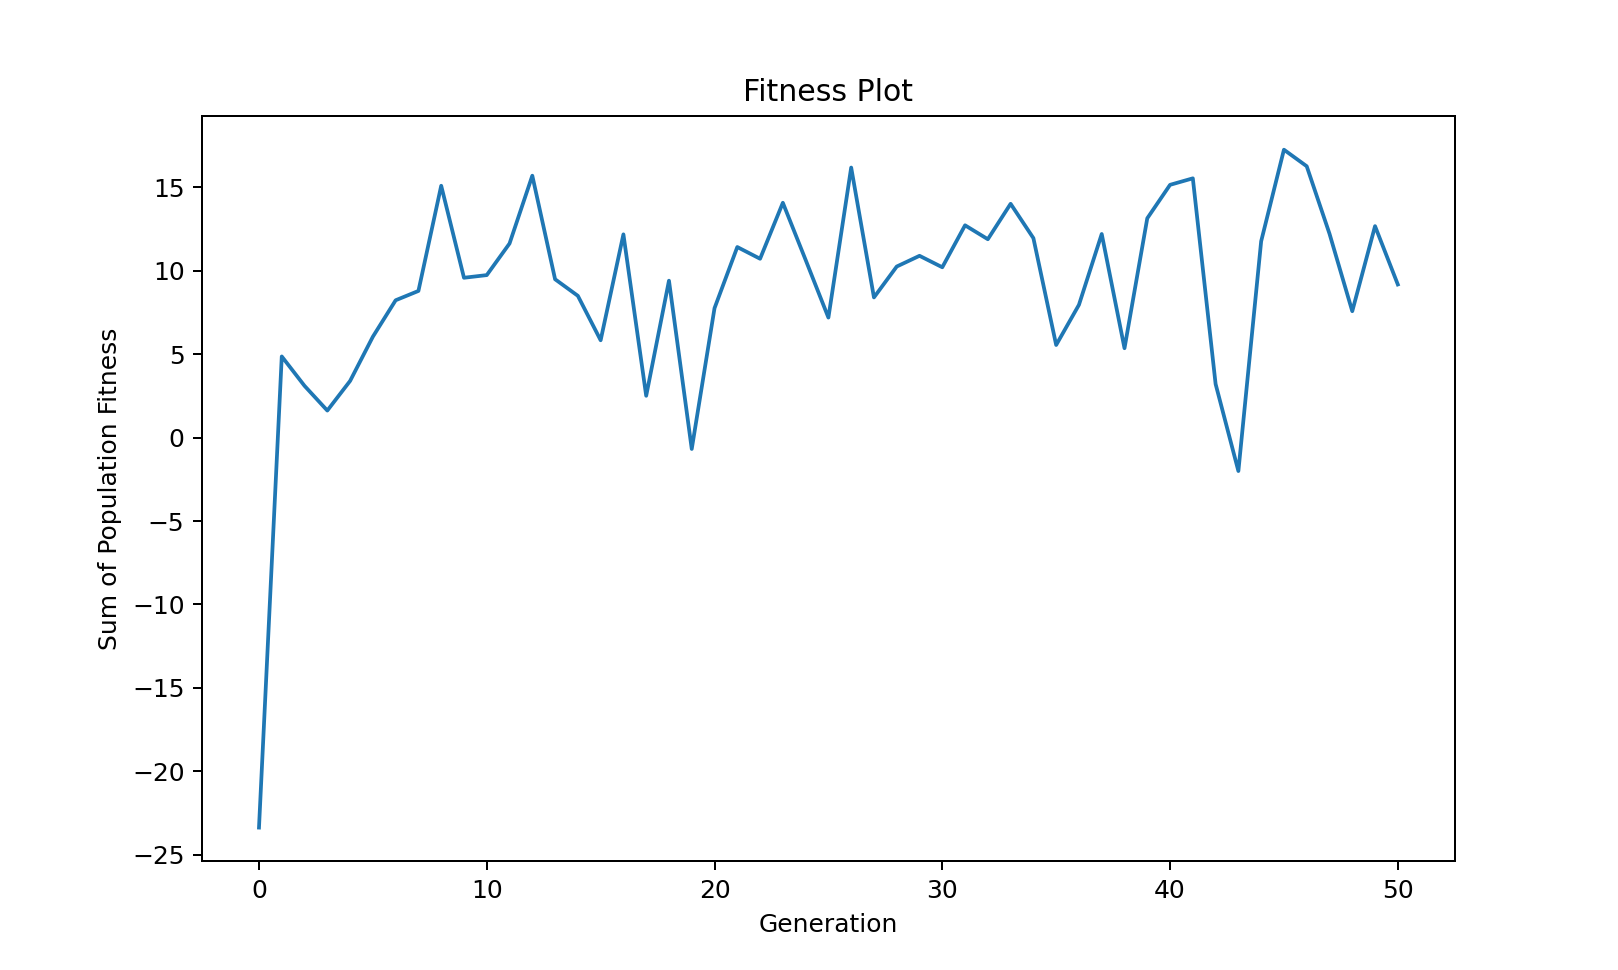

In [13]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_3[i][3]) for i in eval_log_3.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 4: Demo GA - Feature selection

In [14]:
# View data set

data_df = pd.read_csv('data/data.csv', index_col=[0])
values_df = pd.read_csv('data/values.csv', index_col=[0])
display(data_df, values_df)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,8.0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53.0,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24.0,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34.0,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42.0,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,28.0,10.0,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,...,0.01,0.75,0.57,0.74,0.71,0.03,0.17,0.02,0.00,0.19
1989,12.0,10.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6.0,10.0,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9.0,10.0,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,6.0,10.0,0.2,0.78,0.14,0.46,0.24,0.77,0.5,0.62,...,0.68,0.5,0.34,0.35,0.68,0.11,0.3,0.05,1.0,0.48


In [15]:
params_4 = {
        'indiv_len': 102,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

algorithm_4 = GA(params_4, fitness=feature_fitness)

In [16]:
# RMSE Error Without Feature Selection
import LinReg


linreg = LinReg.LinReg()
feats = values_df.to_numpy().shape[1]
x = data_df.to_numpy().reshape(feats, data_df.to_numpy().shape[0])
y = values_df.to_numpy().reshape(feats, 1)
error = linreg.get_fitness(x, y)

print('Error without feture selection:', error)
    

Error without feture selection: 1.1948934351036553


In [17]:
eval_log_4 = algorithm_4.run()

Algorithm succsessfully executed


In [18]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_4.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation', generation, ':\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population RMSE error:', ['{:.3f}'.format(item) for item in data[3]], '\n\n')

Generation 0 :

Population: ['100110110001011101010000101100010101001101010111011110100010100111000001110100011101011000011101001111', '011010101000111010101011111000011110011010111010001000100100001110101000000101000000100000011000001010', '111011101111000110000111011000000100100000000101101111100100011001110111111011001001000000010001101000', '100010011000001111011011111110001111000100011001110011000101101100010010001101010110100001100000010011', '001001110101001111101011011110011000101110000010100100101010110000000000001100011101000100011101011101', '000110100101000111111110011010011110001101000111100011000000101001011100101100111010100111000010000011', '001001111110010101101110001011101000011000001111011000110010000101010111100100101110011100111000001101', '101000000010011010011011100100111001011000110001001000000000011111011001001011110111110001011000110010', '011100000101000100111000011101011111100000100110101000101011101101000111001000010011100000011100000110', '1011100100100001

<IPython.core.display.Javascript object>


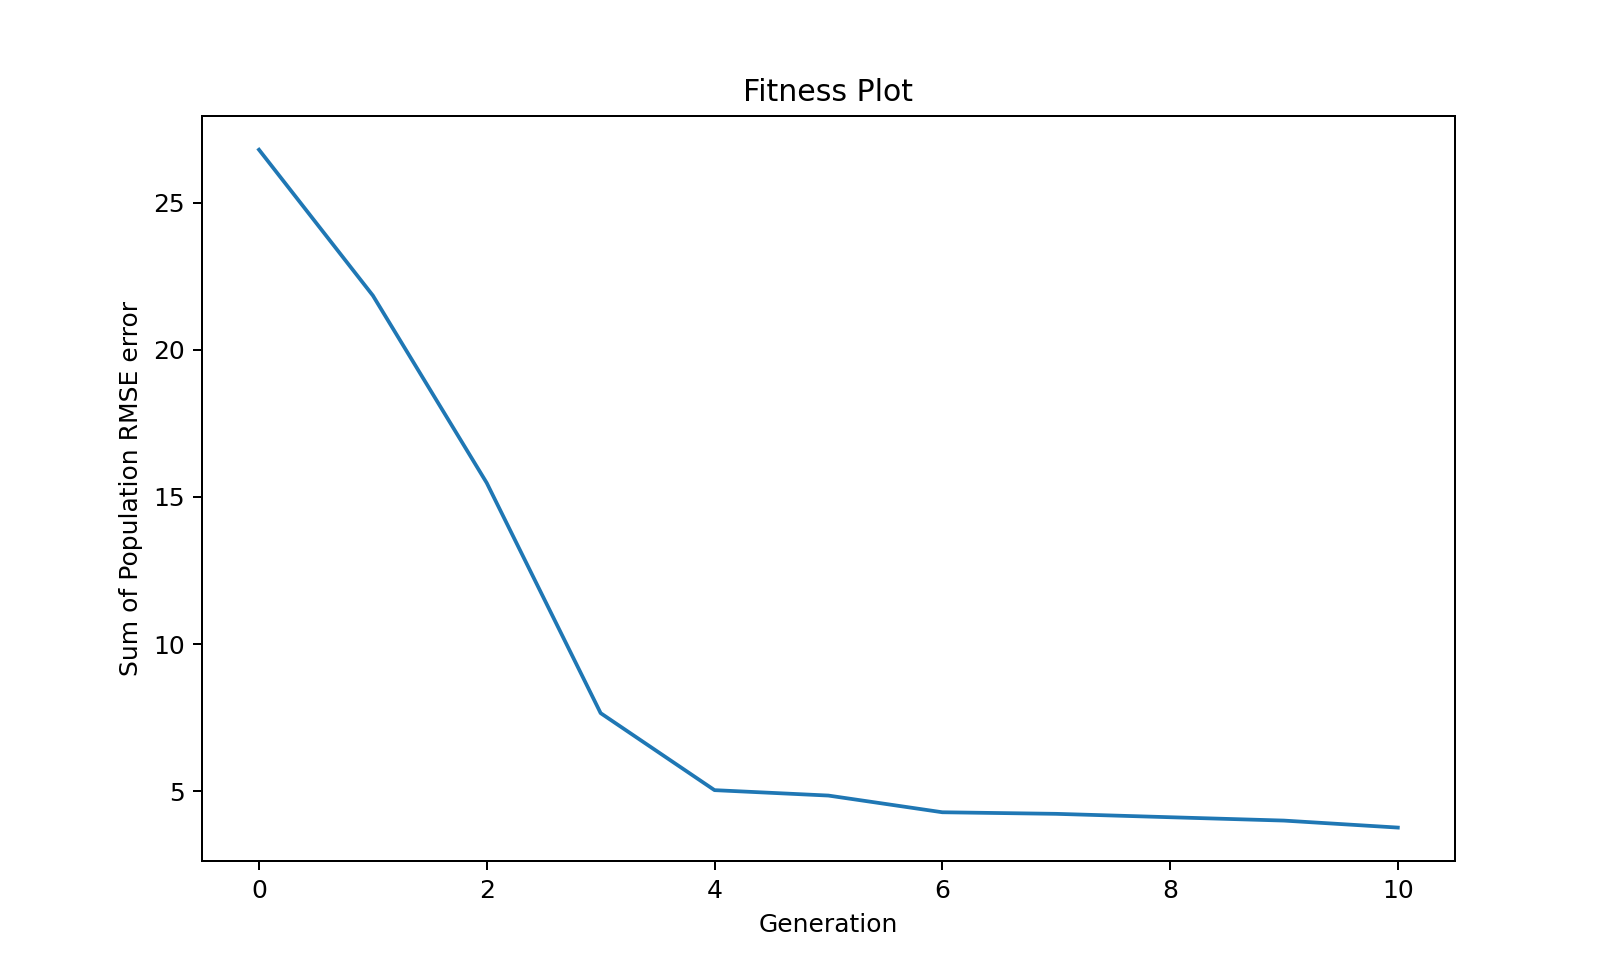

In [19]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_4[i][3]) for i in eval_log_4.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population RMSE error");
axs.plot(gen_fitness)



In [20]:
# Print key measures
print('Last 10 generation average: min, mean, medidan:')
min_list = [min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]
mean_list = [np.mean(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]
median_list = [np.median(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]

print(['{:.3f}'.format(item) for item in [np.mean(min_list), np.mean(mean_list), np.mean(median_list)]], '\n')
min_list.sort()
print('Five fittest individuals:', ['{:.3f}'.format(item) for item in min_list[:5]])

Last 10 generation average: min, mean, medidan:
['0.155', '0.377', '0.241'] 

Five fittest individuals: ['0.106', '0.126', '0.129', '0.134', '0.149']


In [21]:
min_dict = {eval_log_4[i][np.argmin(min(eval_log_4[i][3]))][3]:min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]}
print('The best individuals from the last 10 generations:\n')
for key, value in min_dict.items():
    print(key, 'Fitness: {:.3f}'.format(value))


The best individuals from the last 10 generations:

111001101011101001001011111101110111111101111001001000000101101001101000011111011110011110100111011010 Fitness: 0.217
101110010010000111101001111010011110011001101010011100000101111110001010001101000011011111100010101011 Fitness: 0.192
100101101011101001001011111001110111111101111001001000000101101001100000011111011010011110100110011010 Fitness: 0.167
101001100010110100101000110100000010101100110110010000000110100100110110100111100010011010001000110001 Fitness: 0.106
000000011110000000010111110110110100010111010000100110101111001001100110100011011110010011100100111010 Fitness: 0.173
000000011110000000010111110110110100010111010000100110101111001001100110100011011110010011101100111010 Fitness: 0.149
001001110101001111101011011110011000111110000010100100101010100001000001001100010101000101011101011001 Fitness: 0.134
000000011110000000010111110110110100010111010000100110101111001011100110100011011110010011101100111011 Fitness: 0.129
0000

## 5: Demo GA - Sine [5, 10] with Crowding

In [22]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness, survival_selecter=crowding_selection)
eval_log_3 = algorithm_3.run()

Algorithm succsessfully executed


## 5: Demo GA - Feature selection with Crowding